# 2 モンテカルロ法で円周率をもとめよう
ここではモンテカルロ法を使って円周率を求めます．

# 2.1 グラフィックの準備
グラフィックを使用するために，下記のコードセルを実行を実行（shift + Enter）してください．ここでは Python でグラフィック機能を使用できるようにします．

ただし，下記のコードセルを実行しても何も表示されません．

In [1]:
import matplotlib.pyplot as plt  ## グラフィック描画用オブジェクト
import numpy as np

import random
import math

# 2.2 モンテカルロ法
# 2.2.1 座標の表示
モンテカルロ法とは，乱数を使用した計算方法です．円周率を求めるために，先ず 1/4 円を表示します．

下記コードセルを実行すると，1/4 円が表示されます．

表示されない場合は，一番最初のコードセルを実行し直してください．それでも表示されない場合は，一回ログアウトしてから再接続してみてください．

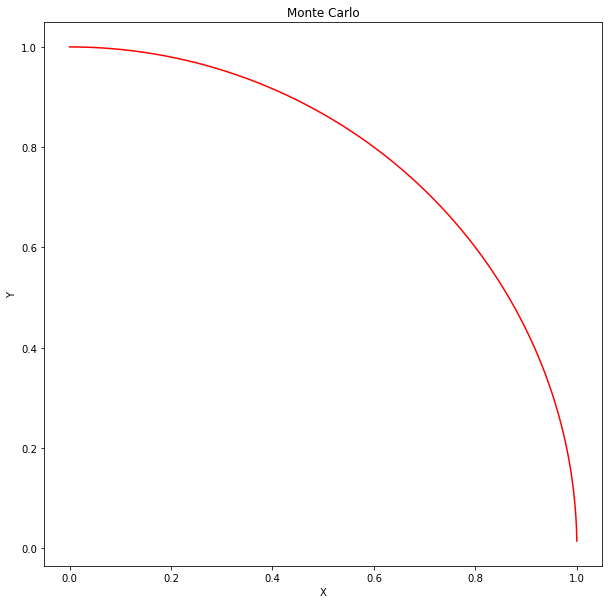

In [2]:
################################################################
## 座標の表示
plt.figure(figsize=(10,10))   # グラフのサイズ
plt.xlabel("X")               # X軸ラベル
plt.ylabel("Y")               # Y軸ラベル
plt.title("Monte Carlo")      # タイトル

times  = np.arange(0, 1.0, 0.0001)  # X軸の刻み
circle = np.sqrt(1.0-times*times)   # 1/4 円の方程式  y = √（1-x*x）
plt.plot(times, circle, "red")      # 1/4 円を描く

plt.show()  # グラフの表示
plt.close() # グラフの使用終了

### 2.2.2 円周率の求め方と実行
- モンテカルロ法では x, y 座標について，それぞれ 0 ~ 1 までの乱数を発生させます．
- 次に乱数によってできた x, y 座標点を上記の1/4 円の図に書き込みます．
- この時，発生させた全ての点の数と円内に入った点の数は，それぞれの面積に比例するはずです（本当の乱数が使用された場合）
- つまり，**（円内に入った点の数）** **/** **（発生させた全ての点の数）** **＝** **（1/4円の面積）** **/** **1** 
    - **π** ＝ **（円内に入った点の数）/（発生させた全ての点の数）＊４**
    - 0 ~ 1 の乱数の発生は **Double.random(in: 0.0...1.0)** で行います．
    
それでは早速やってみましょう．下記のプログラムは乱数（座標点）を 10,000組（個）発生させています．

プログラムの最期から２行目の 円周率 **pi** を計算する場所で，**XXX** と **YYY** の部分を適当な変数名で書き換えて，実行してみてください．

PI = 3.14496


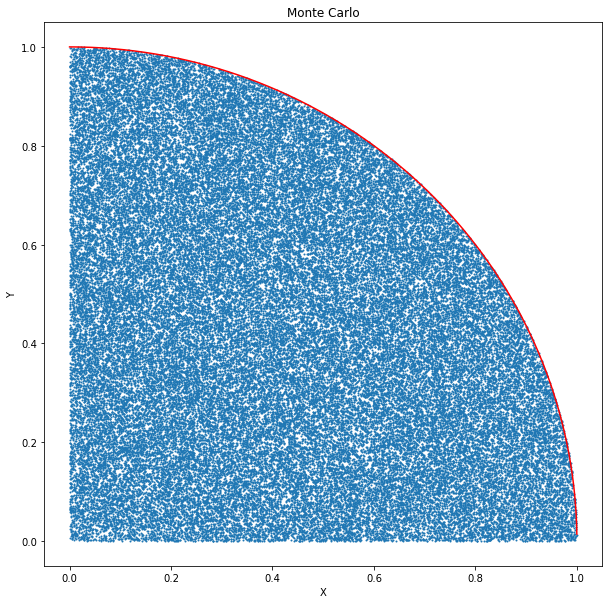

In [3]:
################################################################
## 座標の定義
plt.figure(figsize=(10, 10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Monte Carlo")

times  = np.arange(0, 1.0, 0.0001)
circle = np.sqrt(1.0 - times*times)
plt.plot(times, circle, "red")

################################################################
## 乱数生成と円内に入ったかの判定
total = 100000     ## 全ての点の数
xx: float = []    ## X座標値の保管場所
yy: float = []    ## Y座標値の保管場所

count = 0         ## 円内に入った点を数えるための変数
for _ in range(total):          ## total回繰り返す   
    x = random.uniform(0.0, 1.0)  ## X座標
    y = random.uniform(0.0, 1.0)  ## Y座標
    if (x*x + y*y<=1.0):          ## 円内か？
        count += 1                  ## 円内の場合は count を 1 増やす
        xx.append(x)                ## 描画するために X座標を保存
        yy.append(y)                ## 描画するために Y座標を保存

pi = count/total*4.0    ## 円周率の計算
print("PI =", pi)       ## 円周率の表示

################################################################
## グラフの表示
plt.scatter(xx, yy, 1)   ## 円内に入った点のX,Y座標をグラフに設定
plt.show()               ## グラフの表示
plt.close()              ## グラフの使用終了

### 2.2.3 処理の関数化
結果は実際の円周率（3.14159265）とは少し違うようです．点の数が 10,000 個では少ないのかも知れません．

円周率の計算を簡単に実行できるようにするために，上記のプログラムを関数化します．関数内ではグラフィックの描画は行いませんので，グラフィック機能はコメントアウトします．また生成する点の数は関数の引数として外部から指定できるようにします．

上記のプログラムと同じように 円周率 pi を計算する場所で，**XXX** と **YYY** の部分を適当な変数名で書き換えて実行してください．

なおこのプログラムも関数を定義しているだけなので，コードセルを実行しても何も表示されません．（エラーの場合はエラーメッセージがでます）

In [4]:
##
def montecarlo(total):
    #total = 10000     ## 全ての点の数
    #xx: float = []    ## X座標値の保管場所
    #yy: float = []    ## Y座標値の保管場所

    count = 0          ## 円内に入った点を数えるための変数
    for _ in range(total):          ## total回繰り返す   
        x = random.uniform(0.0, 1.0)  ## X座標
        y = random.uniform(0.0, 1.0)  ## Y座標
        if (x*x + y*y<=1.00):         ## 円内か？
            count += 1                  ## 円内の場合は count を 1 増やす
            #xx.append(x)                ## 描画するために X座標を保存
            #yy.append(y)                ## 描画するために Y座標を保存

    pi = count/total*4.0    ## 円周率の計算
    #print("PI =", pi)       ## 円周率の表示    
    
    return pi

### 2.2.4 関数の確認
それでは関数 **montecarlo( )** が正しく定義されたかどうか，以下のコードセルを実行してみましょう．

それらしい数値が表示されましたか？

In [5]:
print(montecarlo(100000))

3.13012


### 2.2.5 乱数の発生数（全点の数）の違いによる結果の違い
乱数の発生数（全点の数）の違いによる結果の違いを調べてみましょう.

下記プログラムは，500 ~ 10000点 まで 500点おきの 乱数点（x, y の組）に対する円周率の計算結果をグラフにするためのプログラムです．

実行してみましょう．

PI = 3.14548


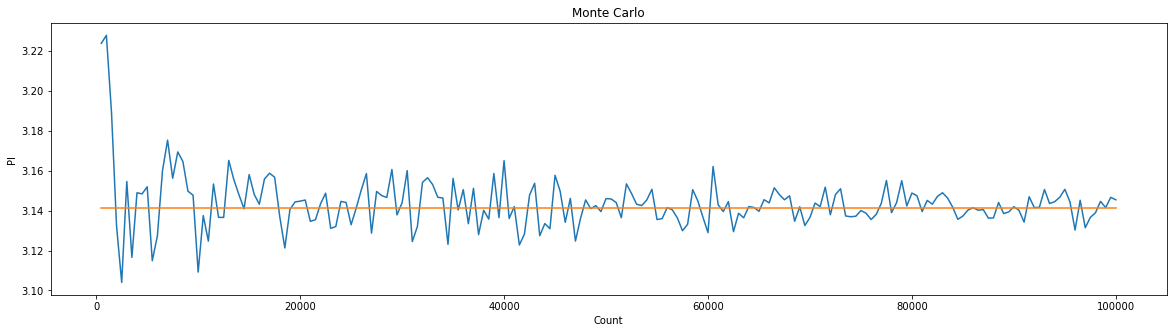

In [6]:
################################################################
## 座標の定義
plt.figure(figsize=(20, 5))
plt.xlabel("Count")
plt.ylabel("PI")
plt.title("Monte Carlo")

################################################################
## （全点の数の違いによる）円周率の計算
step = 500        ## 点の数の増加幅
maxp = 100000     ## 全ての点の数
cnt = np.arange(step, maxp+step, step) ## X軸の刻み
ppi: float = []   ## 計算結果（円周率）の保存場所
ect: float = []   ## 正確な π をグラフ表示するための変数

for n in cnt:     ## setp ~ maxlp まで step 刻みで計算する
    pi = montecarlo(n)   ## 関数 montecarlo(n) よる円周率の計算
    ppi.append(pi)       ## 計算結果を格納
    ect.append(math.pi)  ## 正確な π   

print("PI =", pi)
    
################################################################
## グラフの表示
plt.plot(cnt, ppi)  ## 計算結果をグラフに設定
plt.plot(cnt, ect)  ## 正確な π をグラフに設定
plt.show()          ## グラフの表示
plt.close()         ## グラフの使用終了

### 2.2.6 高速に計算する
上記のプログラムは，ある点の数に対して，円周率をその都度計算しています．
例えば，montecarlo(5000) を計算した後，montecarlo(5500) をもう一回初めから計算しています．
そのため実行速度は遅く，var maxlp = 100000 (10万) 位に設定するとかなり表示が遅くなります（サーバも結構忙しくなる）．

高速に計算するために，前の結果を利用して新しい結果が出せないだろうか？　つまり 5500 点を計算する場合は，500 点については新たに計算し，5000 点についてはこれまでの計算結果を利用できないだろうか？

円内に入った点の数と円周率は単純に比例するから，円周率を単純に平均しても良いはずです．つまり各回の結果は以下のようになります．
```
- 1回目の結果 --- pi(1) = m(1)
- 2回目の結果 --- pi(2) = (m(1) + m(2)) / 2               = (pi(1)   + m(2)) / 2
- 3回目の結果 --- pi(3) = (m(1) + m(2) + m(3)) / 3        = (pi(2)*2 + m(3)) / 3
- 4回目の結果 --- pi(4) = (m(1) + m(2) + m(3) + m(4)) / 4 = (pi(3)*3 + m(4)) / 4
- ......
- i回目の結果 --- pi(i) = (m(1) + m(2) + .... + m(i)) / i = (pi(i-1)*(i-1) + m(i)) / i
```
* ただし，pi(i) は それ以前の結果を考慮した i回目の円周率の計算結果．m(i) は i回目の新に計算した montecarlo( ) の値

以下のプログラムについて，**XXX** と **YYY** の部分を適当な変数名で書き換えて実行してみよう．結果はどうなりますか？


In [ ]:
################################################################
## 座標の定義
plt.figure(figsize=(20, 5))
plt.xlabel("Count")
plt.ylabel("PI")
plt.title("Monte Carlo")

################################################################
## （全点の数の違いによる）円周率の計算
step = 500        ## 点の数の増加幅
maxp = 1000000    ## 全ての点の数
cnt = np.arange(step, maxp+step, step) ## X軸の刻み
ppi: float = []   ## 計算結果（円周率）の保存場所
ect: float = []   ## 正確な π をグラフ表示するための変数

prv_pi = 0.0;     ## 1回前の計算結果とする
i = 1;            ## 計算の回数
for n in cnt:     ## setp ~ maxlp まで step 刻みで計算する
    ##pi = montecarlo(n)
    ## 時間が掛かりすぎるので，改造する
    monte = montecarlo(step)        ## その回での円周率の計算
    pi = (prv_pi*(i-1) + monte)/i   ## これまでの計算を考慮した場合の円周率の計算
    prv_pi = pi                     ## 今回の計算結果を1回前の計算結果とする
    i += 1                          ## 計算の回数を 1回増やす
    #
    ppi.append(pi)         ## 計算結果を格納
    ect.append(math.pi)    ## 正確な π       

print("PI =", pi)

################################################################
## グラフの表示
plt.plot(cnt, ppi)  ## 計算結果をグラフに設定
plt.plot(cnt, ect)  ## 正確な π をグラフに設定
plt.show()          ## グラフの表示
plt.close()         ## グラフの使用終了

### 2.2.7 結果について
回数を多くしても，正確な円周率に近づいたり離れたりしている．

これは何故だろう？

In [ ]:
!/usr/local/bin